In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy.stats as st

#### Task 1: Asymptotic Distributions

1. Simula $T=40$ observaciones de una distribución Rayleigh con parámetro $0.5$. Repite el ejercicio para $T= 400, 4000$ con el mismo parámetro. Muestra los histogramas en un plot y las estadísticas descriptivas.

,T=40,T=400,T=4000
count,40.000000,400.000000,4000.000000
mean,0.702663,0.639617,0.628312
std,0.325625,0.322606,0.331961
min,0.126900,0.025181,0.007716
25%,0.468140,0.398210,0.378287
50%,0.693046,0.613438,0.585126
75%,0.861702,0.860791,0.836089
max,1.531755,1.662227,2.227616


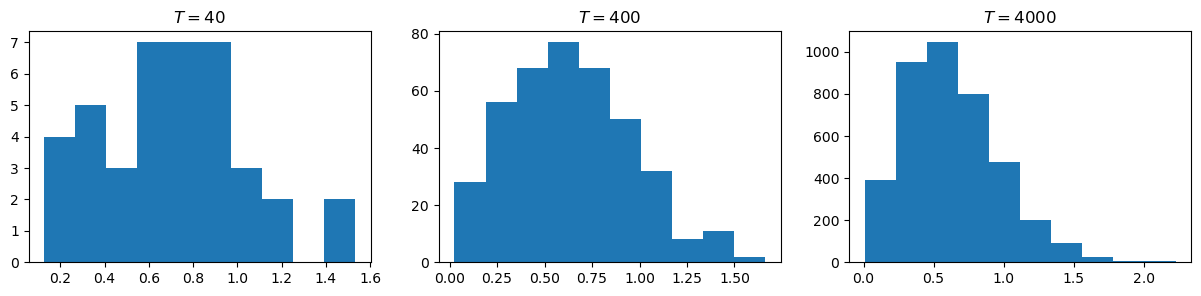

In [45]:
Ts= [40,400,4000]
scale= 0.5
fig, axis = plt.subplots(1,3,figsize=(15,3))
estadisticos = pd.DataFrame()
observaciones = []

for i in range(len(Ts)):
    observaciones.append(np.random.rayleigh(scale,Ts[i]))
    df = pd.DataFrame(np.transpose(observaciones[i]), columns=["T={}".format(Ts[i])])
    estadisticos = pd.concat([estadisticos,df.describe()], axis=1)
    axis[i].hist(observaciones[i])
    axis[i].set_title("$T=$" + str(Ts[i]))

estadisticos


2. Calcula la serie $\sqrt(T)( \bar{Y_T} - \mu )$ (busca una expresión para $\mu$ en internet) y muestra el histograma para $T$ en un plot

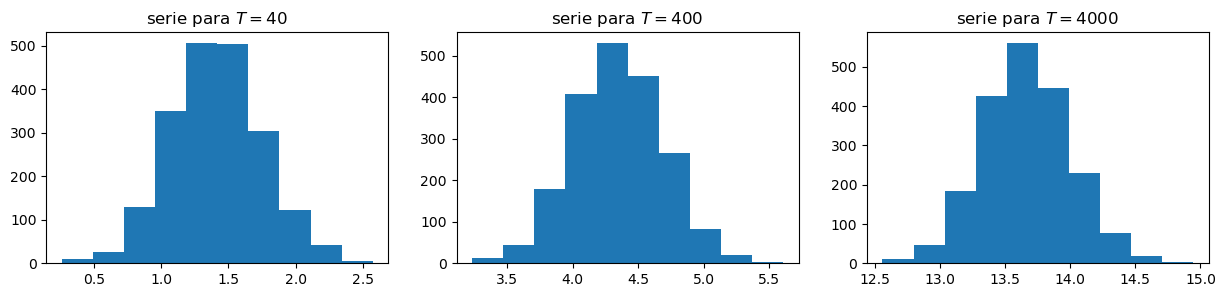

In [51]:
k=2000
fig, axis = plt.subplots(1,3,figsize=(15,3))
for i in range(len(Ts)):
    serie = np.zeros(k)
    for j in range(k):
        observacion = np.random.rayleigh(scale,Ts[i])
        mu = np.std(observacion)*((math.pi/2)**(1/2))
        serie[j] = math.sqrt(Ts[i])*(np.mean(observacion)-mu)
    axis[i].hist(serie)
    axis[i].set_title("serie para $T=$" + str(Ts[i]))


#### Task 2: Useful Distributions

1. Simula $T=40$ observaciones de una distribución normal con $\sigma = 1$ y $\mu = 0.5, 1, 1.8, 2, 5$. En una figura, muestre los histogramas y las estadísticas descriptivas

,mu=0.5,mu=1,mu=1.8,mu=2,mu=5
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.546759,0.963007,1.794359,2.046382,5.224577
std,1.045472,0.990397,0.907387,0.990217,1.085881
min,-1.510807,-1.224631,0.160997,-0.214082,3.032508
25%,-0.258416,0.193001,1.197997,1.565058,4.609274
50%,0.525861,1.139201,1.942821,2.168669,5.153682
75%,1.163739,1.536190,2.325557,2.694837,5.975690
max,2.934108,2.735270,3.793664,3.768118,7.525815


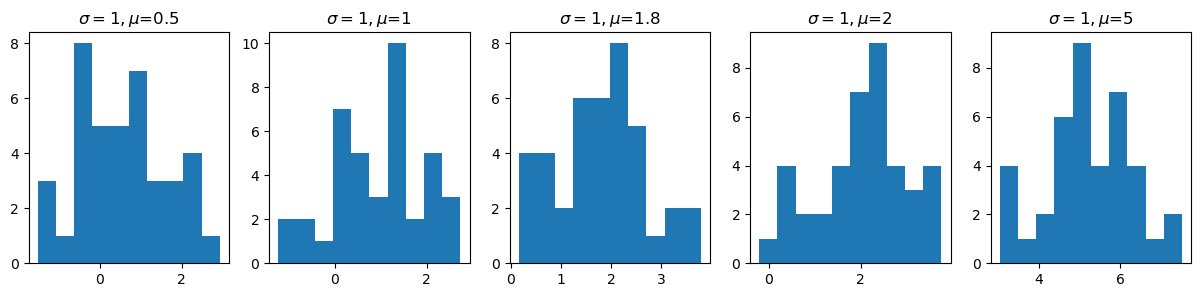

In [61]:
mus = [0.5,1,1.8,2,5]
sigma= 1
T=40
fig, axis = plt.subplots(1,5,figsize=(15,3))
observaciones = np.zeros((T,len(mus)))
for i in range(len(mus)):
  observaciones[:,i] = np.random.normal(mus[i],sigma,T)
  axis[i].hist(observaciones[:,i])
  axis[i].set_title("$\sigma=1, \mu$=" + str(mus[i]))

df = pd.DataFrame(observaciones, columns=["mu={}".format(i) for i in mus])
df.describe()

2. Realice la misma simulación $2000$ veces, calcule las medias y obtenga es t-estadístico para $H_0: \mu = 0$, $H_1: \mu \neq 0$. Muestre el histograma del t-estadístico ($2000$ t-estadísticos). ¿Qué tan seguido rechazamos la hipótesis nula? 

,Proporción de rechazos de h0 con mu=0.5,Proporción de rechazos de h0 con mu=1,Proporción de rechazos de h0 con mu=1.8,Proporción de rechazos de h0 con mu=2,Proporción de rechazos de h0 con mu=5
0,0.874,1.0,1.0,1.0,1.0


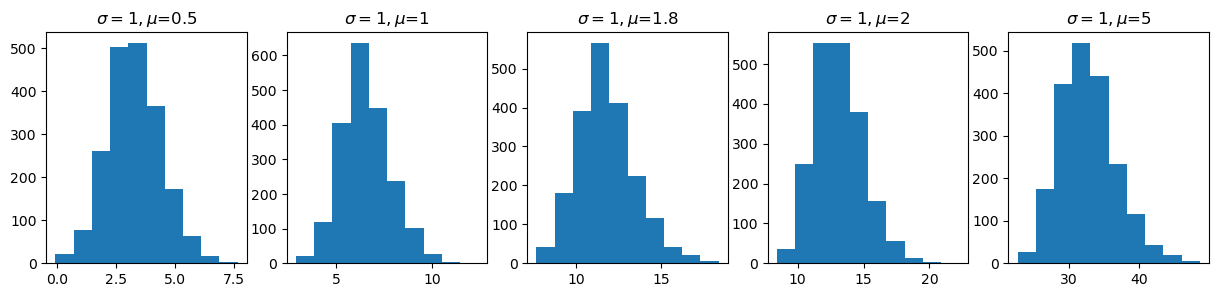

In [54]:
simulations = 2000
fig, axis = plt.subplots(1,5,figsize=(15,3))
percentile_25 = st.t.ppf(0.025, T-1) #valor crítico inferior
percentile_975 = st.t.ppf(0.975, T-1) #valor crítico superior
proporcion_t = np.zeros((1,len(mus)))
for i in range(len(mus)):
    t = np.zeros(simulations)
    cont = 0
    for j in range(simulations):
        observacion = np.random.normal(mus[i],sigma,T)
        t[j] = np.mean(observacion)/(np.std(observacion)/math.sqrt(T))
        if t[j] < percentile_25 or t[j] > percentile_975:
            cont +=1
    proporcion_t[0,i] = cont/simulations
    axis[i].hist(t)
    axis[i].set_title("$\sigma=1, \mu$=" + str(mus[i]))

df = pd.DataFrame(proporcion_t, columns=["Proporción de rechazos de h0 con mu={}".format(i) for i in mus])
df

3. Repita el ejercicio para $T = 100, 400, 2000, 4000$ para los mismos $\mu$, $\sigma^2$ y obtenga el t-estadístico. Muestre el histograma del t-estadístico para $T = 4000$

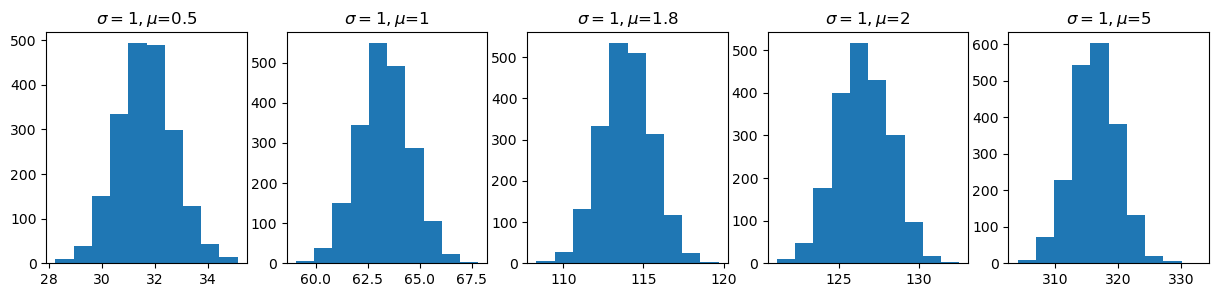

In [62]:
Ts = [100, 400, 2000, 4000]
fig, axis = plt.subplots(1,5,figsize=(15,3))
proporciones = np.zeros((len(Ts), len(mus)))
for i in range(len(Ts)):
    percentile_25 = st.t.ppf(0.025, Ts[i]-1) #valor crítico inferior
    percentile_975 = st.t.ppf(0.975, Ts[i]-1) #valor crítico superior
    t = np.zeros((len(mus),simulations))
    for j in range(len(mus)):
        cont = 0
        for k in range(simulations):
            observacion = np.random.normal(mus[j],sigma,Ts[i])
            t[j,k] = np.mean(observacion)/(np.std(observacion)/math.sqrt(Ts[i]))
            if t[j,k] < percentile_25 or t[j,k] > percentile_975:
                cont+=1
        proporciones[i,j] =cont/simulations

for i in range(len(mus)):
    axis[i].hist(t[i,:])
    axis[i].set_title("$\sigma=1, \mu$=" + str(mus[i]))

4. Haga una tabla mostrando la proporción de rechazos como 

In [65]:
df = pd.DataFrame(np.transpose(proporciones), columns=["T={}".format(i) for i in Ts], index=["mu={}".format(i) for i in mus])
df

,T=100,T=400,T=2000,T=4000
mu=0.5,0.9985,1.0,1.0,1.0
mu=1,1.0000,1.0,1.0,1.0
mu=1.8,1.0000,1.0,1.0,1.0
mu=2,1.0000,1.0,1.0,1.0
mu=5,1.0000,1.0,1.0,1.0


#### Task 3: Useful Distributions

1.

,mu=0.5,mu=1,mu=1.8,mu=2,mu=5
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,3.367937,5.411471,8.504862,10.415055,190.076294
std,3.620240,6.589100,10.831113,13.300643,157.002719
min,0.131389,0.461288,0.594770,0.160107,11.123819
25%,0.846072,1.471215,2.676724,3.057758,96.794460
50%,2.213383,2.848013,4.835363,7.182752,139.141794
75%,4.915302,6.951766,8.253167,12.195621,231.151656
max,16.727297,31.218541,51.995113,71.363157,735.639965


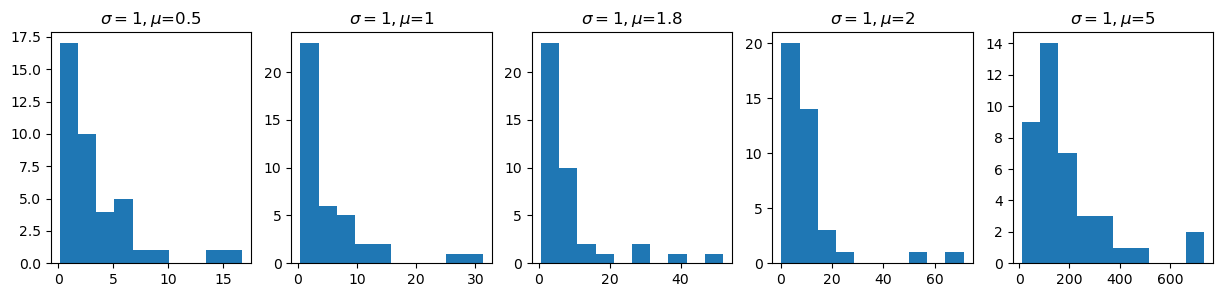

In [63]:
T = 40
mus = [0.5,1,1.8,2,5]
fig, axis = plt.subplots(1,5,figsize=(15,3))
sigma= 1
observaciones = np.zeros((T,len(mus)))
for i in range(len(mus)):
    observaciones[:,i] = np.random.lognormal(mus[i], sigma,T)
    axis[i].hist(observaciones[:,i])
    axis[i].set_title("$\sigma=1, \mu$=" + str(mus[i]))
df = pd.DataFrame(observaciones, columns=["mu={}".format(i) for i in mus])
df.describe()

2.

Medias para log normal con cada mu
[  2.71828183   4.48168907   9.97418245  12.18249396 244.69193226]


,cantidad de rechazos de h0 con mu=0.5,cantidad de rechazos de h0 con mu=1,cantidad de rechazos de h0 con mu=1.8,cantidad de rechazos de h0 con mu=2,cantidad de rechazos de h0 con mu=5
0,0.9995,0.9985,0.9995,1.0,0.9995


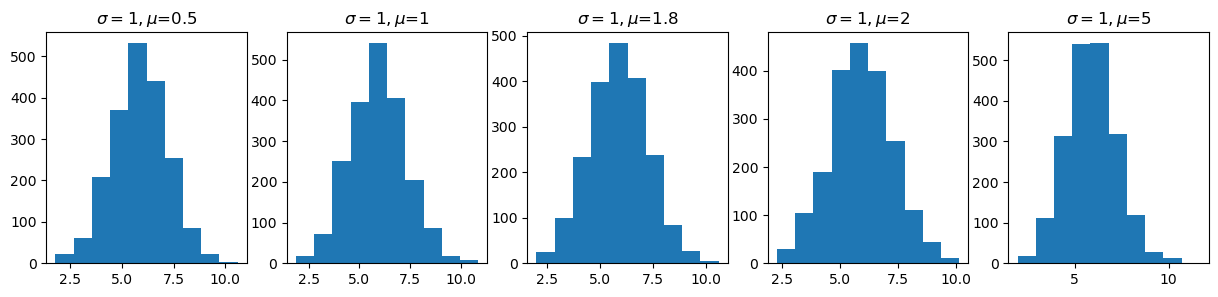

In [74]:
simulations = 2000
fig, axis = plt.subplots(1,5,figsize=(15,3))
percentile_25 = st.t.ppf(0.025, T-1) #valor crítico inferior
percentile_975 = st.t.ppf(0.975, T-1) #valor crítico superior
proporcion_t = np.zeros((1,len(mus)))
muestral_mu = np.zeros(len(mus))
for i in range(len(mus)):
    muestral_mu[i] = math.exp(mus[i]+(sigma**2)/2)
    t = np.zeros(simulations)
    cont = 0
    for j in range(simulations):
        observacion = np.random.lognormal(mus[i],sigma,T)
        t[j] = np.mean(observacion)/(np.std(observacion)/math.sqrt(T))
        if t[j] < percentile_25 or t[j] > percentile_975:
            cont +=1
    proporcion_t[0,i] = cont/simulations
    axis[i].hist(t)
    axis[i].set_title("$\sigma=1, \mu$=" + str(mus[i]))

print("Medias para log normal con cada mu")
print(muestral_mu)
df = pd.DataFrame(proporcion_t, columns=["cantidad de rechazos de h0 con mu={}".format(i) for i in mus])
df


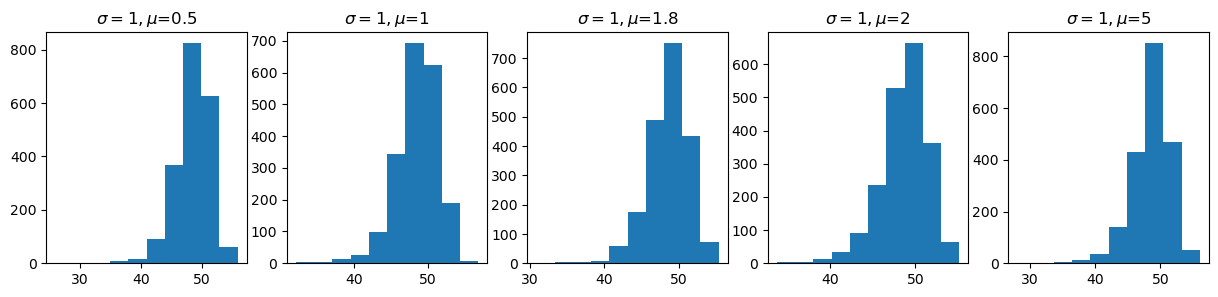

In [75]:
Ts = [100, 400, 2000, 4000]
fig, axis = plt.subplots(1,5,figsize=(15,3))
proporciones = np.zeros((len(Ts), len(mus)))
for i in range(len(Ts)):
    percentile_25 = st.t.ppf(0.025, Ts[i]-1) #valor crítico inferior
    percentile_975 = st.t.ppf(0.975, Ts[i]-1) #valor crítico superior
    t = np.zeros((len(mus),simulations))
    for j in range(len(mus)):
        cont = 0
        for k in range(simulations):
            observacion = np.random.lognormal(mus[j],sigma,Ts[i])
            t[j,k] = np.mean(observacion)/(np.std(observacion)/math.sqrt(Ts[i]))
            if t[j,k] < percentile_25 or t[j,k] > percentile_975:
                cont+=1
        proporciones[i,j] =cont/simulations

for i in range(len(mus)):
    axis[i].hist(t[i,:])
    axis[i].set_title("$\sigma=1, \mu$=" + str(mus[i]))

In [76]:
df = pd.DataFrame(np.transpose(proporciones), columns=["T={}".format(i) for i in Ts], index=["mu={}".format(i) for i in mus])
df

,T=100,T=400,T=2000,T=4000
mu=0.5,1.0,1.0,1.0,1.0
mu=1,1.0,1.0,1.0,1.0
mu=1.8,1.0,1.0,1.0,1.0
mu=2,1.0,1.0,1.0,1.0
mu=5,1.0,1.0,1.0,1.0


#### Task 4

- Conclusiones Task 1: Podemos observar que a medida que se corre la simulación con diferentes tamaños (manteniendo las condiciones experimentales) se observan amplias diferencias entre en T pequeño (T=40) y un T grande (T=4000). A medida que este tamaño muestral aumenta, el experimento es más robusto. Es decir, cada vez que corriamos una simulación, los resultados para T=40 variaban inmensamente mientras que para T=4000 se mantenían.
- Conclusiones Task 2: Respecto a los estadísticos descriptivos de las simulaciones podemos decir que se mantienen similares con un 10% de error aproximadamente. Es decir, la media y la desviación estándar muestrales son parecidas a las poblacionales. Respecto a las pruebas de hipótesis, podemos observar que cuando $\mu = 0.5$, se rechaza en una proporción entre 0.85 y 0.9, cuando $\mu > 0.5$, es decir, el resto de los casos, siempre se rechaza. Para las segundas pruebas de hipótesis, es algo equivalente para un T pequeño, sin embargo, para T> 40, se rechaza siempre la nula incluso con $\mu = 0.5$, lo cual se observa en la tabla generada en este punto.
- Conclusiones Task 3: Podemos observar que con la distribución log-normal, escogiendo tanto como para $\mu$ y $\sigma$ los mismos para los puntos anteriores. Observamos que para las pruebas de hipótesis ocurre algo contario a la de la normal y es que con $T=40$ no se rechaza la hipotesis al 100% a medida que se incrementa $\mu$. Sin embargo al momento de incrementar el tamaño muestral sí ocurre que se rechaza siempre. 